In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction

In [2]:
def rmse(x,y):
    return np.mean((x - y) ** 2) ** 0.5

# Модели над url'aми

In [41]:
urls_train_df = pd.read_csv('url_domain_train', header=None, delimiter='\t')
urls_train_df.columns = ['id', 'url', 'count']
urls_train_df = urls_train_df[['id', 'url']]

In [42]:
urls_train_df = pd.DataFrame(urls_train_df.groupby('id')['url'].apply(lambda x: x.tolist()))
urls_train_df['id'] = urls_train_df.index
urls_train_df.index = range(len(urls_train_df))
urls_train_df.columns = ['urls', 'id']

In [3]:
age_train_df = pd.read_csv('age_profile_train', header=None, delimiter='\t')
age_train_df.columns = ['id', 'age']

In [43]:
train_df = urls_train_df.merge(age_train_df, on='id', how='left')

In [189]:
#topk = 30000
X, y = train_df.urls.values[:], train_df.age.values[:]

In [190]:
X = map(lambda x: ' '.join(x), X)
hw = HashingVectorizer(n_features=1800).fit(X)
X = pd.DataFrame(hw.transform(X).todense())

In [191]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, y, 
                                                                                     test_size = 0.00000003)

In [97]:
X[:4]

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.028502,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Линейная регрессия

In [98]:
reg = LinearRegression()
reg.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
linear_pred = reg.predict(test_data)

In [100]:
rmse(linear_pred, test_labels)

11.860705303416577

## Линейная регрессия над tfidf

In [192]:
linear_tfidf = pipeline.Pipeline([('tfidf', feature_extraction.text.TfidfTransformer()), 
                                ('linear_model', linear_model.LinearRegression())])
linear_tfidf.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)), ('linear_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [102]:
pred_linear_tfidf = linear_tfidf.predict(test_data)
rmse(pred_linear_tfidf, test_labels)

11.805174353985405

## Буст

In [8]:
import xgboost as xgb

In [82]:
dtrain = xgb.DMatrix(data = train_data, label = train_labels)

In [83]:
param = {'max_depth':10,
         'eta':0.31,
         'silent':1,
         'objective':'reg:linear',
         'min_child_weight': 8}
num_round = 50

In [84]:
bst = xgb.train(param, dtrain, num_round)

In [85]:
boost_pred = bst.predict(xgb.DMatrix(data = test_data))

In [86]:
rmse(boost_pred, test_labels)

11.954921318507456

Populating the interactive namespace from numpy and matplotlib


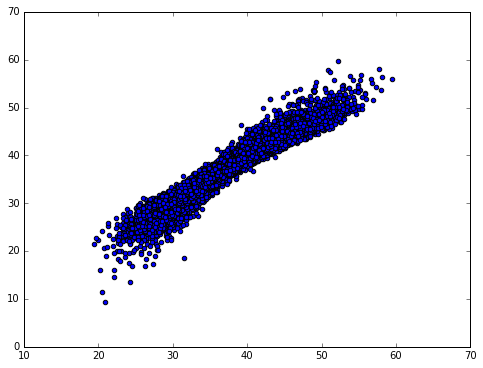

In [65]:
%pylab inline
pylab.figure(figsize=(8, 6))
pylab.scatter(pred_linear_tfidf, linear_pred)

In [64]:
pred_linear_tfidf.shape

(35581,)

# Модели над  тайтлами

In [4]:
titles_train_df = pd.read_csv('title_unify_train', header=None, delimiter='\t')
titles_train_df.columns = ['id', 'title', 'count']
titles_train_df = titles_train_df[['id', 'title']]
titles_train_df = pd.DataFrame(titles_train_df.groupby('id')['title'].apply(lambda x: x.tolist()))
titles_train_df['id'] = titles_train_df.index
titles_train_df.index = range(len(titles_train_df))
titles_train_df.columns = ['title', 'id']
train_title = titles_train_df.merge(age_train_df, on='id', how='left')
train_title[:15]

,title,id,age
0,[бесплатный надёжный почта рамблер электронный...,000000013CB5719C0000A2C90002C101,53
1,[24-х 34-х до договор неделя новость предложит...,00000001442BE24000001B7D00F50801,48
2,"[авто бош контакт королёв сервис, авто бош кор...",00000001448580F800003F1B31FB0901,28
3,[ua втрать війни донбасі за на новини озвучить...,0000000145BDB2FF000157971645E901,44
4,"[black walnut грецкий орех чёрный, inmoment ru...",000000014602771F0000DB9359714C01,48
5,[апрель год день март месяц на неделя от погод...,0000000147B2D6F311DB5C4201B7FB01,36
6,[rankw ru tovar xoz xoz-tovar анализ доход ком...,0000000147C68954150168D701A8B801,33
7,[возможность госзакупка консультант малое плюс...,0000000147EB76D738CD80750C879701,41
8,[13d билет заказать имя купить на спектакль те...,00000001482AAFB69FA5228008AC2A01,51
9,[1-метр velol александр альберто арно велоспор...,0000000148390BB56A6B22BB178D3901,32


In [48]:

X_title, y_title = train_title.title.values[:], train_title.age.values[:]

In [49]:
X_title = map(lambda x: ' '.join(x), X_title)
hw = HashingVectorizer(n_features=3500).fit(X_title)
X_title = pd.DataFrame(hw.transform(X_title).todense())

In [50]:
train_data_title, test_data_title, train_labels_title, test_labels_title = cross_validation.train_test_split(X_title, y_title, 
                                                                                     test_size = 0.00000003)

## Линейная регрессия tfidf

In [31]:
reg_title_tfidf = pipeline.Pipeline([('tfidf', feature_extraction.text.TfidfTransformer()), 
                                ('linear_model', linear_model.LinearRegression())])
reg_title_tfidf.fit(train_data_title, train_labels_title)


Pipeline(steps=[('tfidf', TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)), ('linear_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [15]:
linear_pred_title_tfidf = reg_title_tfidf.predict(test_data_title)

In [25]:
rmse(linear_pred_title_tfidf, test_labels_title)

11.962081976716709

## Линейная регрессия

In [70]:
reg_title = LinearRegression()
reg_title.fit(train_data_title, train_labels_title)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
pred_linear_title = reg_title.predict(test_data_title)
rmse(pred_linear_title, test_labels_title)

12.011244774156289

## Буст

In [51]:
rep_data = feature_extraction.text.TfidfTransformer()
rep_data.fit(train_data_title, train_labels_title)
rr = rep_data.transform(train_data_title)


In [52]:
dtrain_title = xgb.DMatrix(data = rr, label = train_labels_title)

In [53]:
param1 = {'max_depth':7,
         'eta':0.35,
         'silent':1,
         'objective':'reg:linear',
         'min_child_weight': 2}
num_round = 25

In [54]:
bst_title = xgb.train(param1, dtrain_title, num_round)

In [42]:
dd = rep_data.transform(test_data_title)

In [44]:
boost_pred_title = bst_title.predict(xgb.DMatrix(data = dd))

In [45]:
rmse(boost_pred_title, test_labels_title)

11.929680981790369

In [110]:
linear_pred.min(), boost_pred_title.min()

(9.3139674099853309, 16.741327)

## Тест для url

In [55]:
urls_test_df = pd.read_csv('url_domain_test', header=None, delimiter='\t')
urls_test_df.columns = ['Id', 'url', 'count']
urls_test_df = pd.DataFrame(urls_test_df.groupby('Id')['url'].apply(lambda x: x.tolist()))
urls_test_df['Id'] = urls_test_df.index
urls_test_df.index = range(len(urls_test_df))
urls_test_df.columns = ['urls', 'Id']
users = urls_test_df['Id']

In [56]:
X = urls_test_df.urls.values
X = map(lambda x: ' '.join(x), X)
X = pd.DataFrame(hw.transform(X).todense())

In [195]:
final_linear_tfidf = linear_tfidf.predict(X)
final_linear_tfidf = pd.DataFrame(final_linear_tfidf)
users = pd.DataFrame(users)

In [196]:
final_linear_tfidf = pd.concat([final_linear_tfidf, users],axis=1)

In [197]:
sample_submission = pd.read_csv('sample_submission.csv')

In [202]:
sample_submission.isnull().sum()

Id     0
age    0
dtype: int64

In [199]:
final_linear_tfidf.shape

(19974, 2)

In [200]:
sample_submission = sample_submission.merge(final_linear_tfidf, on='Id', how='left')

In [201]:
sample_submission.fillna('36.04347', inplace = True)
sample_submission.columns = ['Id', 'age1', 'age']
sample_submission = sample_submission[['Id', 'age']]
sample_submission[:3]

,Id,age
0,000000014A02348E701552980349FF01,40.4212
1,000000014A10EA183BF8594A0B2AB201,42.7763
2,000000014A4FE5C33A929D4C26943601,36.7743


In [203]:
sample_submission.shape

(19979, 2)

In [204]:
sample_submission.to_csv('liner_submission_tfidf.csv', index=False)

## Тест для title

In [57]:
titles_test_df = pd.read_csv('title_unify_test', header=None, delimiter='\t')
titles_test_df.columns = ['Id', 'title', 'count']
titles_test_df = titles_test_df[['Id', 'title']]
titles_test_df = pd.DataFrame(titles_test_df.groupby('Id')['title'].apply(lambda x: x.tolist()))
titles_test_df['Id'] = titles_test_df.index
titles_test_df.index = range(len(titles_test_df))
titles_test_df.columns = ['title', 'Id']
users = titles_test_df['Id']
X_title_test = titles_test_df.title.values[:]
X_title_test = map(lambda x: ' '.join(x), X_title_test)
X_title_test = pd.DataFrame(hw.transform(X_title_test).todense())
X_title_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,-0.016136,-0.002934,0.0,0.0,0.000000,0.001467,0.0,0.0,0.004401,0.005868,...,-0.001467,-0.001467,0.0,0.0,0.0,-0.001467,0.0,0.002934,-0.007335,-0.001467
1,-0.023741,0.000000,0.0,0.0,0.000000,0.011870,0.0,0.0,0.000000,0.000000,...,0.011870,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,-0.102598,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [58]:
dd = rep_data.transform(X_title_test)

In [72]:
final_linear_title = reg_title.predict(X_title_test)
final_linear_title = pd.DataFrame(final_linear_title)
users = pd.DataFrame(users)

In [73]:
final_linear_title = pd.concat([final_linear_title, users],axis=1)

In [74]:
final_linear_title.shape

(19960, 2)

In [75]:
sample_submission = pd.read_csv('sample_submission.csv')

In [76]:
sample_submission[:3]

,Id,age
0,000000014A02348E701552980349FF01,36.04347
1,000000014A10EA183BF8594A0B2AB201,36.04347
2,000000014A4FE5C33A929D4C26943601,36.04347


In [77]:
sample_submission = sample_submission.merge(final_linear_title, on='Id', how='left')

In [78]:
sample_submission.fillna('36.04347', inplace = True)

In [79]:
sample_submission.columns = ['Id', 'age1', 'age']

In [80]:
sample_submission = sample_submission[['Id', 'age']]

In [81]:
sample_submission[:3]

,Id,age
0,000000014A02348E701552980349FF01,37.8776
1,000000014A10EA183BF8594A0B2AB201,42.1061
2,000000014A4FE5C33A929D4C26943601,34.0002


In [82]:
sample_submission.to_csv('liner_submission_title.csv', index=False)

## типа блендинг

In [83]:
s1 = pd.read_csv('liner_submission_title.csv')
#s2 = pd.read_csv('liner_submission1.csv')
s2 = pd.read_csv('liner_submission_tfidf.csv')
s3 = pd.read_csv('liner_submission_title_tfidf.csv')
s4 = pd.read_csv('boost_submission_title.csv')
s5 = pd.read_csv('boost_submission_title_tfidf.csv')

In [84]:
for i in s1.index:
    s1.ix[i, 'age'] = (s1.ix[i, 'age'] + s2.ix[i, 'age'] + s3.ix[i, 'age'] + s4.ix[i, 'age'] + s5.ix[i, 'age']) / 5.0

In [85]:
s1.to_csv('blend1.csv', index=False)